In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, zscore

In [2]:
df = pd.read_csv("data.csv")
display(df.head())

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
display(df.isnull().sum())  
df.fillna(df.mean(numeric_only=True), inplace=True)
display(df.isnull().sum())  

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [5]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_cols]


In [6]:
display(df.describe())

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.00000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.11200
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.09618
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.05100
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.08200
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.13650
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.45700


In [7]:
print('Середнє значення:')
display(df.mean(numeric_only=True))
print('Медіана:')
display(df.median(numeric_only=True))
print('Мода:')
display(df.mode(numeric_only=True).loc[0])  
print('Стандартне відхилення:')
display(df.std(numeric_only=True))
print('Мінімальне значення:')
display(df.min(numeric_only=True))
print('Максимальне значення:')
display(df.max(numeric_only=True))

Середнє значення:


Overall rank                    78.500000
Score                            5.375917
GDP per capita                   0.891449
Social support                   1.213237
Healthy life expectancy          0.597346
Freedom to make life choices     0.454506
Generosity                       0.181006
Perceptions of corruption        0.112000
dtype: float64

Медіана:


Overall rank                    78.5000
Score                            5.3780
GDP per capita                   0.9495
Social support                   1.2550
Healthy life expectancy          0.6440
Freedom to make life choices     0.4870
Generosity                       0.1740
Perceptions of corruption        0.0820
dtype: float64

Мода:


Overall rank                    1.000
Score                           5.358
GDP per capita                  0.332
Social support                  0.896
Healthy life expectancy         0.343
Freedom to make life choices    0.312
Generosity                      0.092
Perceptions of corruption       0.082
Name: 0, dtype: float64

Стандартне відхилення:


Overall rank                    45.177428
Score                            1.119506
GDP per capita                   0.391921
Social support                   0.302372
Healthy life expectancy          0.247579
Freedom to make life choices     0.162424
Generosity                       0.098471
Perceptions of corruption        0.096180
dtype: float64

Мінімальне значення:


Overall rank                    1.000
Score                           2.905
GDP per capita                  0.000
Social support                  0.000
Healthy life expectancy         0.000
Freedom to make life choices    0.000
Generosity                      0.000
Perceptions of corruption       0.000
dtype: float64

Максимальне значення:


Overall rank                    156.000
Score                             7.632
GDP per capita                    2.096
Social support                    1.644
Healthy life expectancy           1.030
Freedom to make life choices      0.724
Generosity                        0.598
Perceptions of corruption         0.457
dtype: float64

In [8]:
z_scores = np.abs(zscore(numeric_df))
outlier_rows = df[(z_scores > 3).any(axis=1)]  
display(outlier_rows)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
19,20,United Arab Emirates,6.774,2.096,0.776,0.670,0.284,0.186,0.112
33,34,Singapore,6.343,1.529,1.451,1.008,0.631,0.261,0.457
95,96,Indonesia,5.093,0.899,1.215,0.522,0.538,0.484,0.018
129,130,Myanmar,4.308,0.682,1.174,0.429,0.580,0.598,0.178
150,151,Rwanda,3.408,0.332,0.896,0.400,0.636,0.200,0.444
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


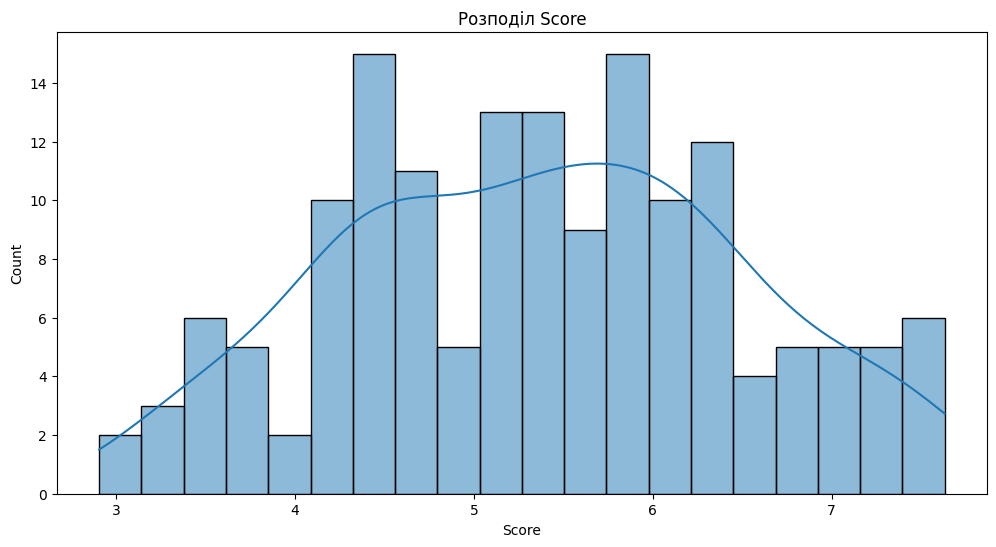

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Score'], kde=True, bins=20)
plt.title("Розподіл Score")
plt.show()


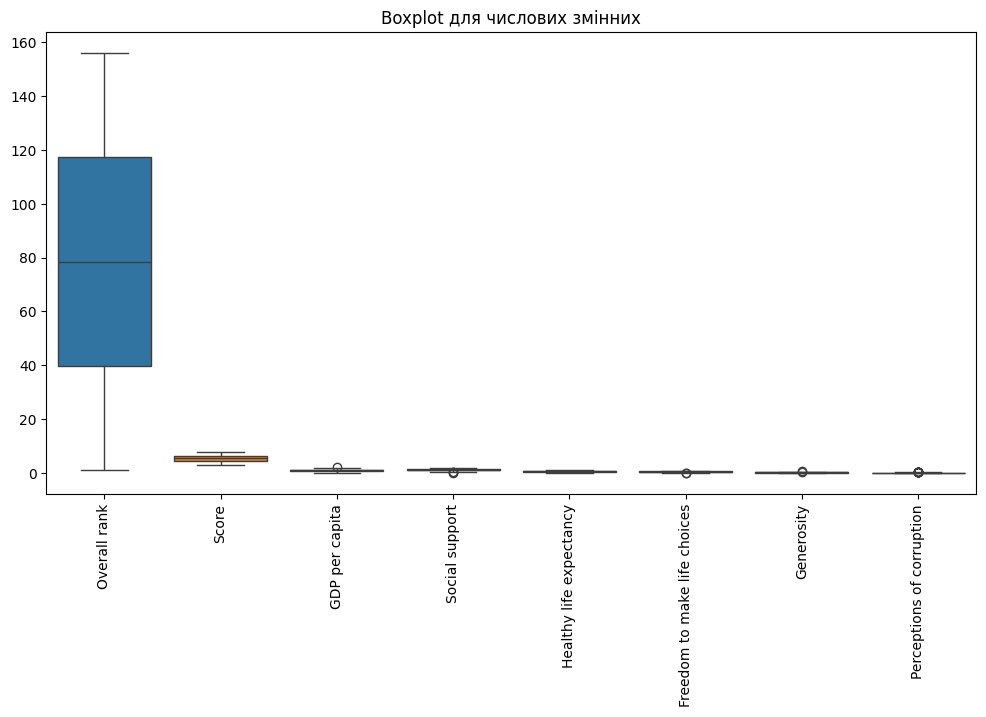

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot для числових змінних")
plt.show()

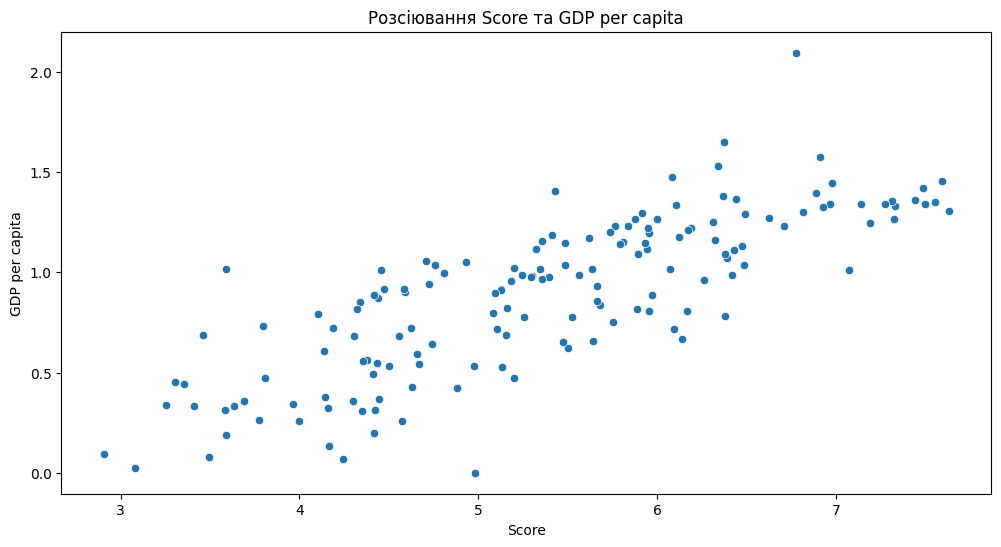

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Score', y='GDP per capita', data=df)
plt.title("Розсіювання Score та GDP per capita")
plt.show()

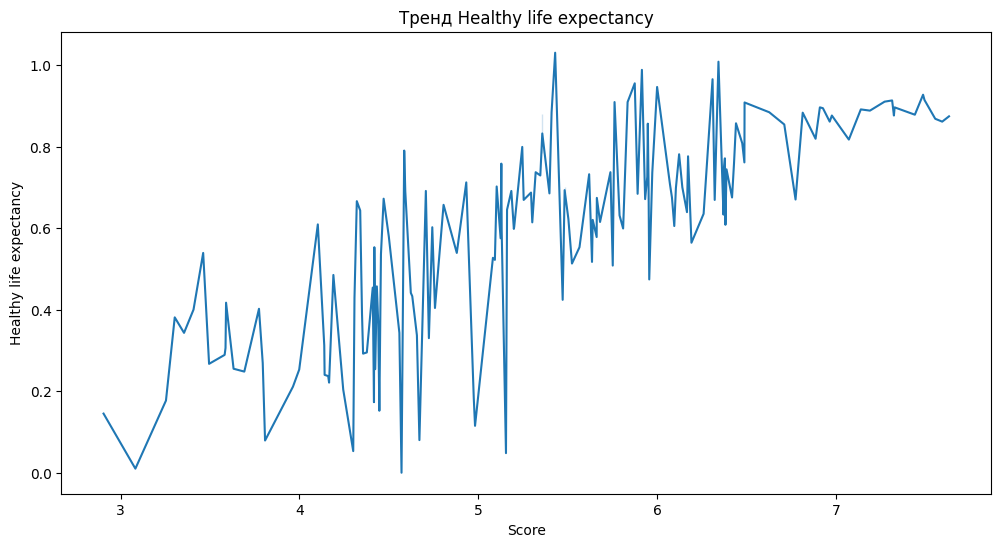

In [12]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Score', y='Healthy life expectancy', data=df)
plt.title("Тренд Healthy life expectancy")
plt.show()


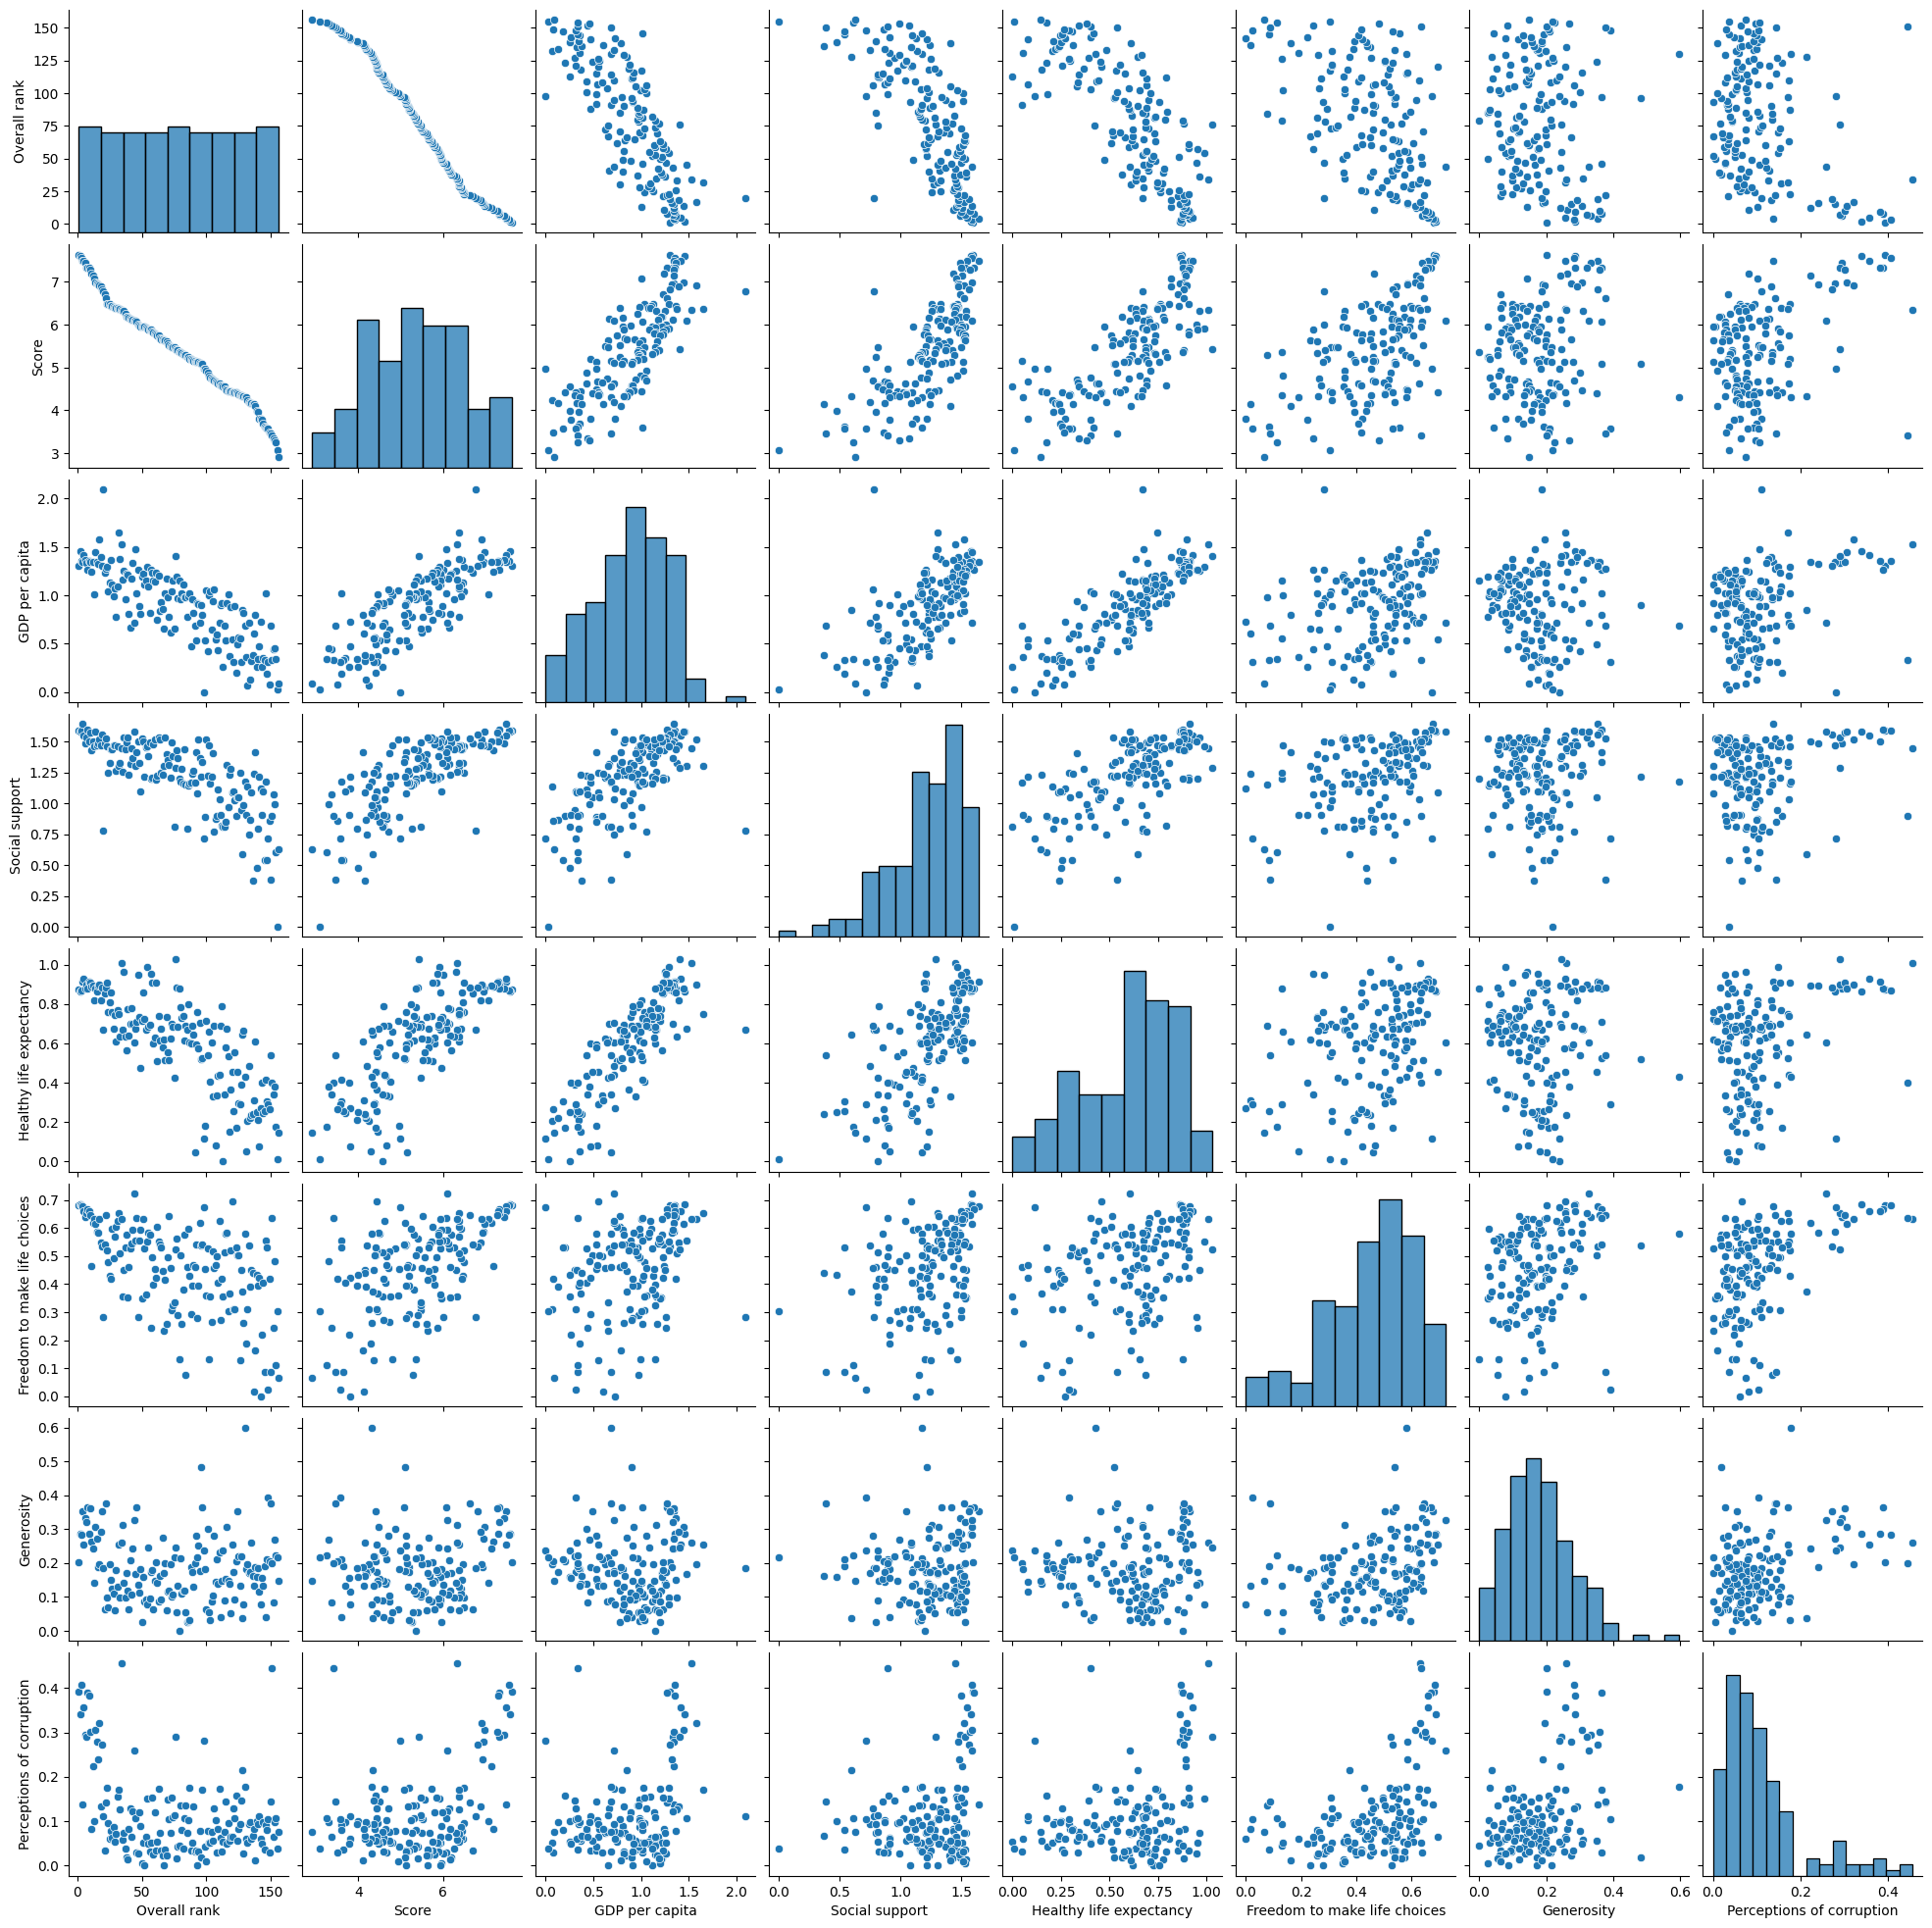

In [13]:
sns.pairplot(numeric_df)
plt.show()

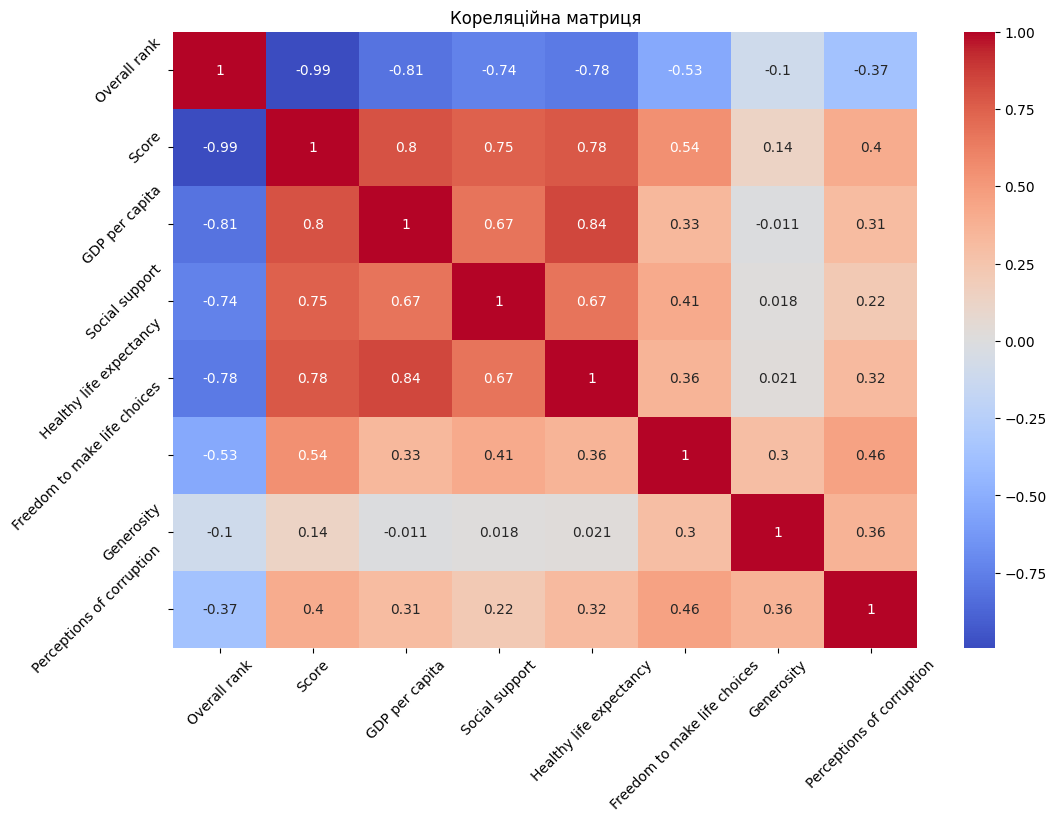

Найсильніші позитивні кореляції:
Overall rank                  Overall rank                    1.000000
Score                         Score                           1.000000
GDP per capita                GDP per capita                  1.000000
Perceptions of corruption     Perceptions of corruption       1.000000
Healthy life expectancy       Healthy life expectancy         1.000000
Freedom to make life choices  Freedom to make life choices    1.000000
Generosity                    Generosity                      1.000000
Social support                Social support                  1.000000
GDP per capita                Healthy life expectancy         0.844273
Healthy life expectancy       GDP per capita                  0.844273
Score                         GDP per capita                  0.802124
GDP per capita                Score                           0.802124
Healthy life expectancy       Score                           0.775814
Score                         Healthy life e

In [14]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Кореляційна матриця")
plt.show()

positive_corr = corr_matrix[corr_matrix > 0.7].stack().sort_values(ascending=False)
print("Найсильніші позитивні кореляції:")
print(positive_corr)

negative_corr = corr_matrix[corr_matrix < -0.7].stack().sort_values(ascending=True)
print("Найсильніші негативні кореляції:")
print(negative_corr)


Stat: 0.9847009168993887, p-value: 0.08279644536822624
Розподіл ймовірно нормальний


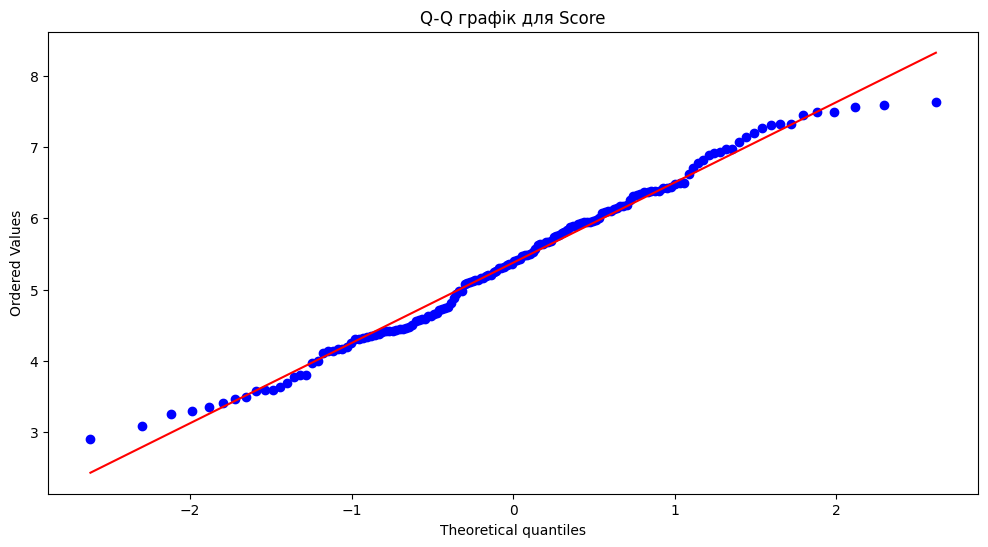

In [15]:
import scipy.stats as stats
from scipy.stats import shapiro

stat, p_value = shapiro(df['Score'])

print(f"Stat: {stat}, p-value: {p_value}")

if p_value > 0.05:
    print("Розподіл ймовірно нормальний")
else:
    print("Розподіл не є нормальним")

plt.figure(figsize=(12, 6))
stats.probplot(df['Score'], dist="norm", plot=plt)
plt.title("Q-Q графік для Score")
plt.show()